# Support Vector Machine (Linear)

In this module, you will learn how to perform classification in scikit-lean with support vector machine. We will take a look at the iris dataset, which is a classic for testing out classification algorithms. Finally, we will use the accuracy score for evaluating how good the model we create really is.

In [1]:
# Non-sklearn packages
import numpy as np
import pandas as pd

# Sklearn modules & functions
from sklearn import datasets
from sklearn.model_selection import train_test_split


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Working with the Iris Dataset

In [2]:
# Setting the Iris dataset
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

## Support Vector Machine

In [3]:
# Importing the Perceptron classifier
from sklearn.svm import SVC

In [4]:
# Initiating a SVM classifier and fit the SVM on the training data
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)

SVC(C=1, kernel='linear')

In [5]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

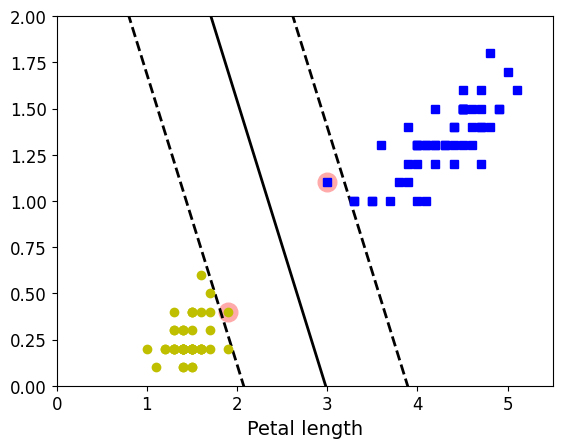

In [6]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()
